In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14, 'font.family' : 'serif'})

In [2]:
mot_pic = np.load("3d_mot.npy")
mot_pic = np.rot90(mot_pic)
mot_pic.shape

(2448, 2048)

## Calibrate axes

We do this against the cavity spacer's hole which has a known height of 25mm. We average the front and back measurement on the assumption that the MOT is between the two internal planes of the cavity faces (i.e. in the centre of the chamber). 

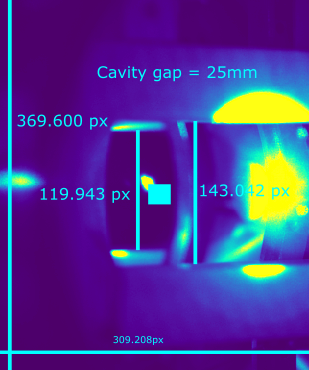

In [3]:
height_of_25mm_in_inkscape = (143.042 + 119.943)/2
height_of_picture_in_inkspace = 369.6
height_of_picture_in_camera_pixels = mot_pic.shape[0]

mm_per_inkskape_pixel = 25 / height_of_25mm_in_inkscape
inkspake_pixels_per_camera_pixel = height_of_picture_in_inkspace / height_of_picture_in_camera_pixels
height_of_image_in_mm = height_of_picture_in_camera_pixels * inkspake_pixels_per_camera_pixel * mm_per_inkskape_pixel

height_of_image_in_mm

70.27016750004752

In [4]:
width_of_picture_in_camera_pixels = mot_pic.shape[1]
width_of_image_in_mm = width_of_picture_in_camera_pixels * inkspake_pixels_per_camera_pixel * mm_per_inkskape_pixel

width_of_image_in_mm

58.78811398696787

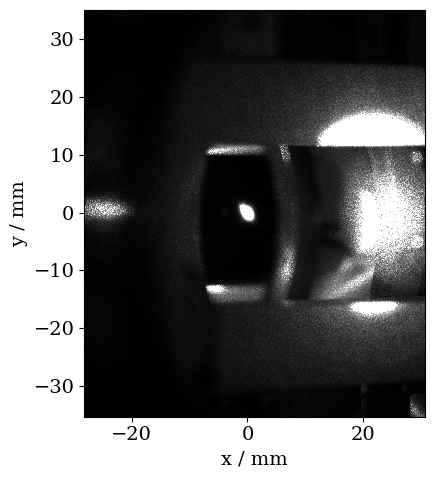

In [5]:
position_of_mot_x_mm = 148.3 * mm_per_inkskape_pixel
position_of_mot_y_mm = (height_of_picture_in_inkspace - 184.1) * mm_per_inkskape_pixel

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(mot_pic,
           extent=(
               -position_of_mot_x_mm, width_of_image_in_mm - position_of_mot_x_mm,
               -position_of_mot_y_mm, height_of_image_in_mm-position_of_mot_y_mm
           ),
           cmap='gray', vmin=0, vmax=255,
           interpolation="none",
          )

plt.xlabel("x / mm")
plt.ylabel("y / mm")

plt.tight_layout()

plt.savefig("3dmot.png")
plt.savefig("3dmot.pdf")